# TP1 : Ma gaussienne et moi

## 1. Fonction de répartition

> 1) Ecrire une fonction qui permet de calculer la fonction de répartition d'une gaussienne standard. Tracer cette fonction de répartition.

La fonction d'erreur est liée à la fonction de répartition $\Phi$ qui est l'intégrale de la loi normale standard :

$$\Phi(x) = \frac{1}{2} (1 + erf(\frac{x}{\sqrt{2}}))$$

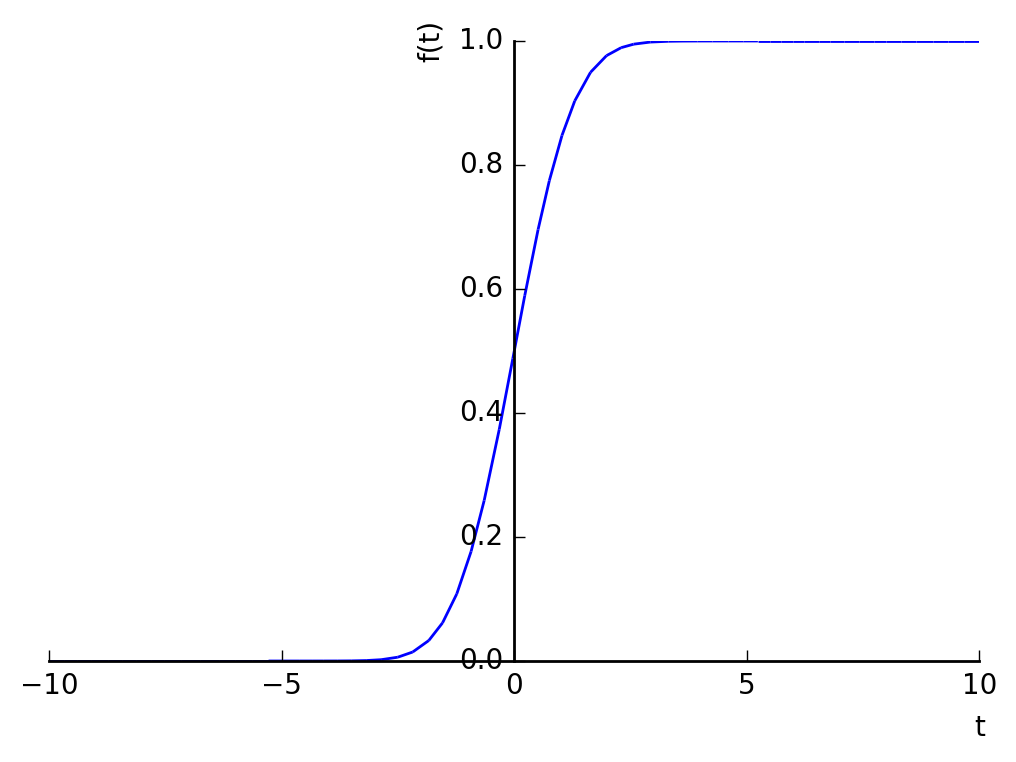

In [24]:
from sympy import *


def cdf(x):
    return 0.5 * (1 + erf(x / sqrt(2)))

t = symbols('t')
curve = cdf(t)
plot(curve)

> 2) Vérifier numériquement la formule d'approximation pour $t$ grand :

$$\mathbb{P}(\mathcal{N}(0, 1) > t) \sim \frac{exp(-t^2 / 2)}{t\sqrt{2\pi}}, (t > 0)$$

En mathématiques $f(t) \sim g(t)$ est vrai si $lim_{t \rightarrow +inf} \frac{f(t)}{gt(t)} = 1$.

In [34]:
approx = exp(-t**2 / 2) / (t * sqrt(2*pi))

print('Limit: {0:.2f}'.format(limit((1 - cdf(t)) / approx, t, oo)))

Limit: 1.00


> 3) Reprendre la question 1) pour une gaussienne quelconque.

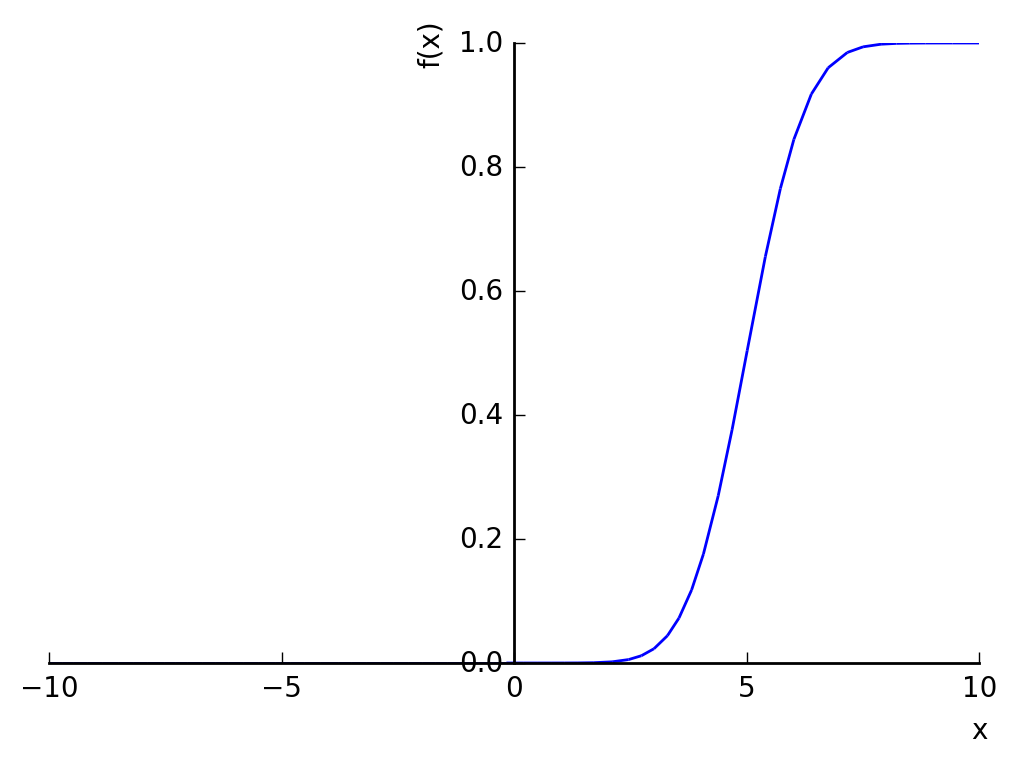

In [35]:
def cdf(x, m, s):
    return 0.5 * (1 + erf((x - m) / (s * sqrt(2))))

x = symbols('x')

mu = 5
sigma = 1

curve = cdf(x, mu, sigma)
plot(curve)

## 2. Fonction de quantile

> 1) Ecrire une fonction qui permet de calculer la fonction de quantile d'une gaussienne standard. Tracer cette fonction.

La fonction quantile d'une distribution est l'inverse de sa fonction de répartition. Dans le cas de la loi normale standard la fonction quantile s'appelle la fonction [probit](https://www.wikiwand.com/en/Probit), elle peut s'exprimer en fonction de la fonction d'erreur inverse:

$$\Phi^{-1}(p) = \sqrt{2} erf^{-1} (2p - 1)$$

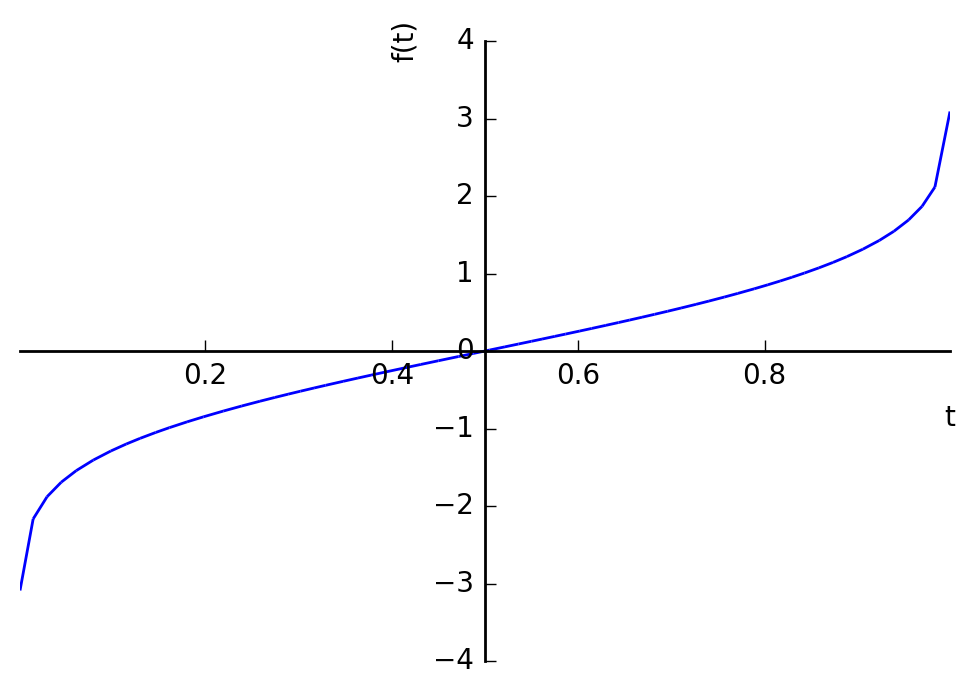

In [36]:
def quantile(p):
    return sqrt(2) * erfinv(2*p - 1)

t = symbols('t')
curve = quantile(t)
plot(curve, (t, 0.001, 0.999))

> 2) Reprendre la question 1) pour une gaussienne quelconque.

$$F^{-1}(p) = \mu + \sigma\Phi^{-1}(p) = \mu + \sigma\sqrt{2}erf^{-1} (2p - 1)$$

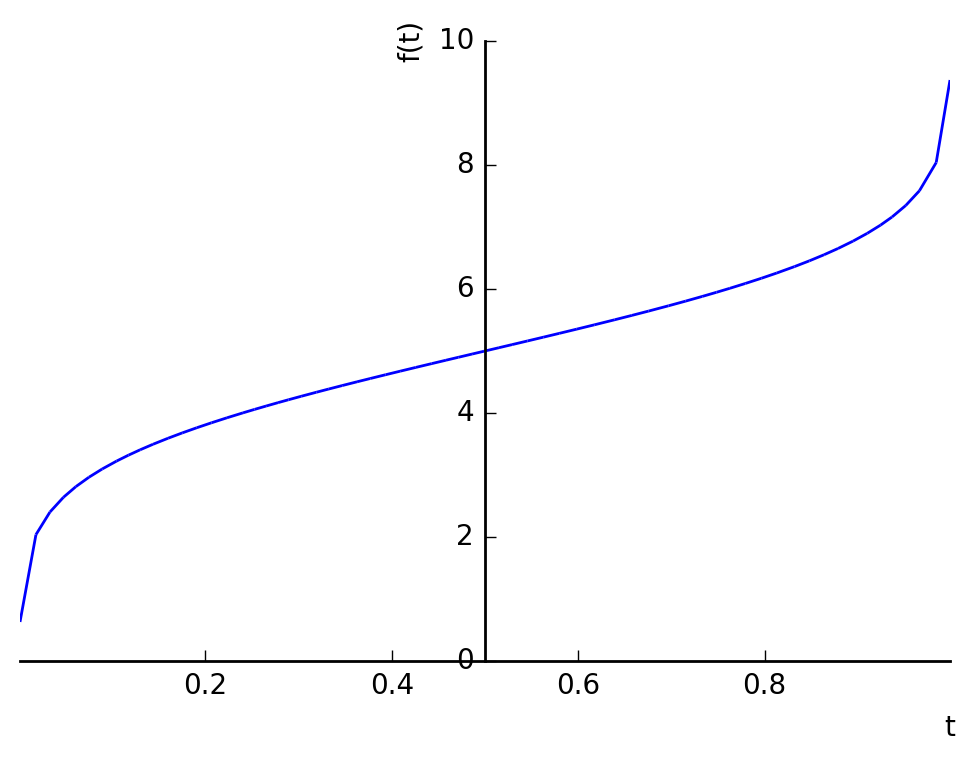

In [37]:
def quantile(p, m, s):
    return m + s * sqrt(2) * erfinv(2*p - 1) * sqrt(2)

mu = 5
sigma = 1

t = symbols('t')
curve = quantile(t, mu, sigma)
plot(curve, (t, 0.001, 0.999))

> 3) Utiliser la fonction quantile pour simuler des réalisations de variables gaussiennes.

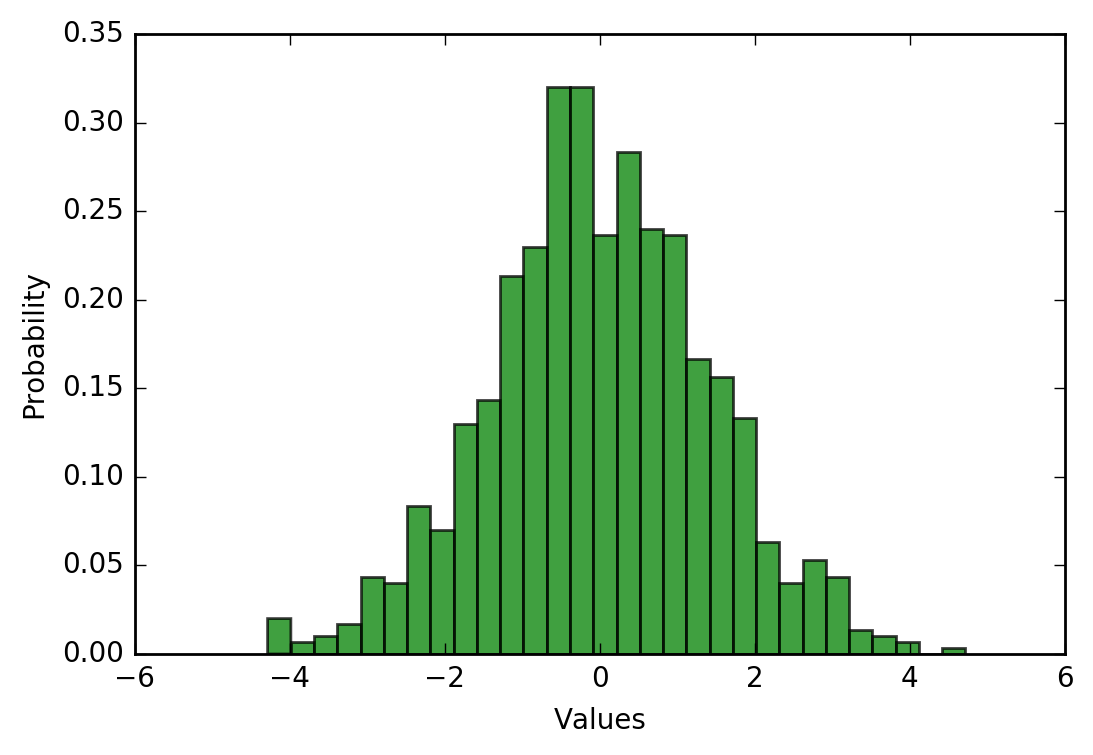

In [38]:
from random import uniform
import matplotlib.pyplot as plt


X = [float(quantile(uniform(0, 1), 0, 1)) for _ in range(1000)]
n, bins, patches = plt.hist(X, 30, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Probability')

plt.show()

## 3. Moyenne empirique

> 1) Simuler des réalisations de loi gaussienne pour différentes valeurs des paramètres. Tracer les histogrammes correspondants.

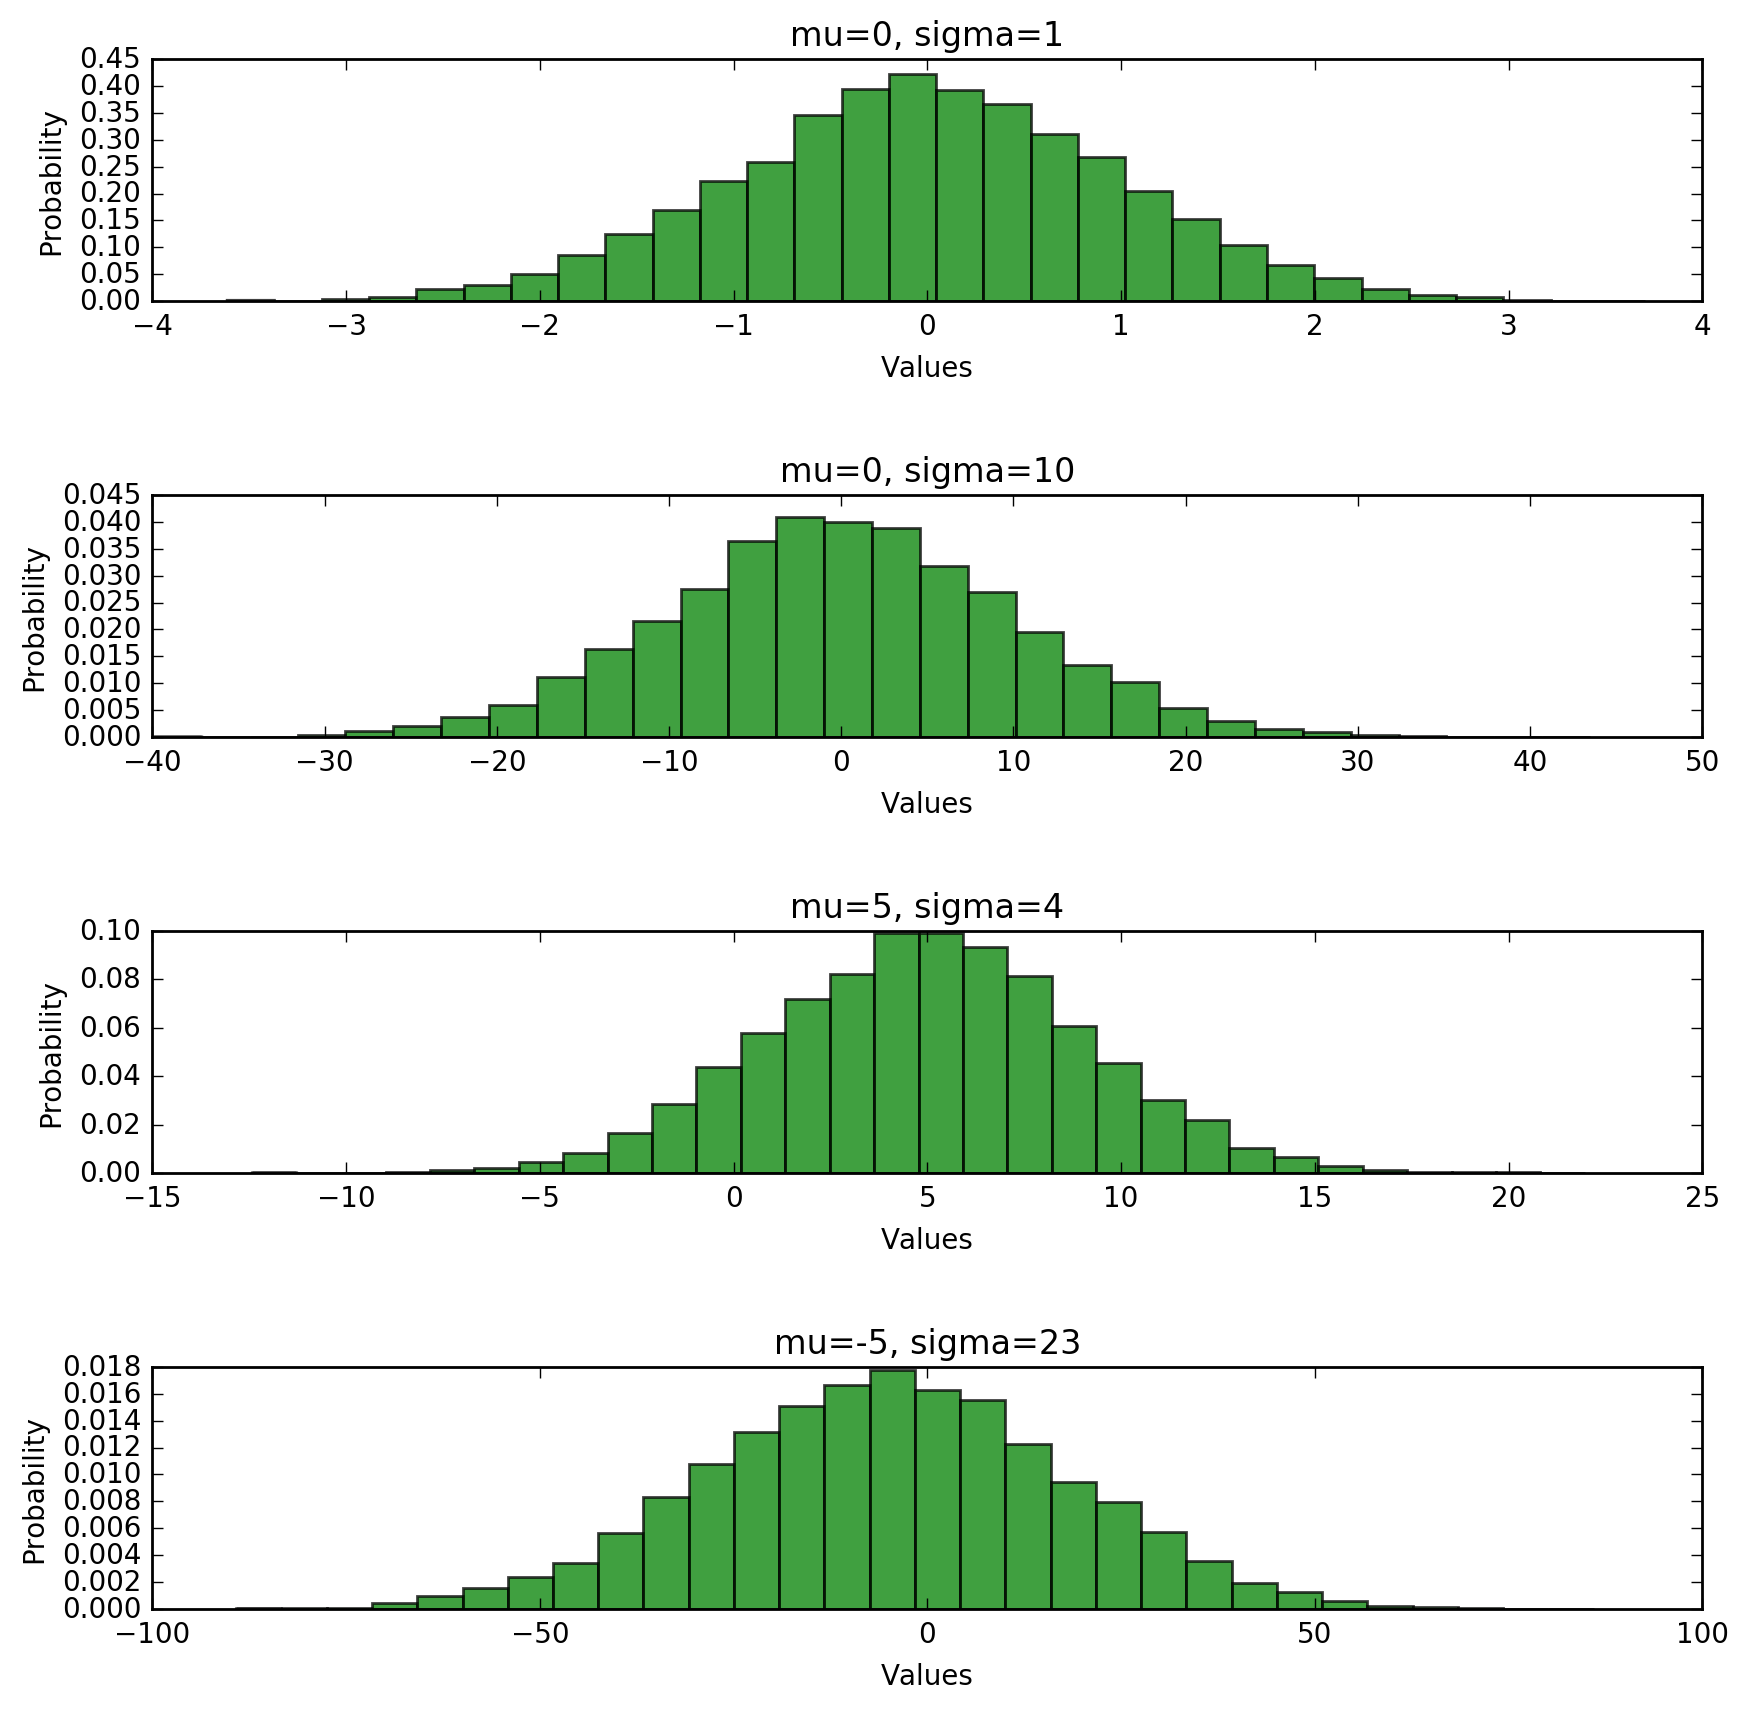

In [39]:
import numpy as np

mus = [0, 0, 5, -5]
sigmas = [1, 10, 4, 23]

fig, axarr = plt.subplots(4, figsize=(10,10))
fig.subplots_adjust(hspace=.8)


for mu, sigma, ax in zip(mus, sigmas, axarr):
    x = mu + sigma * np.random.randn(10000)
    n, bins, patches = ax.hist(x, 30, normed=1, facecolor='green', alpha=0.75)

    ax.set_xlabel('Values')
    ax.set_ylabel('Probability')
    ax.set_title('mu={}, sigma={}'.format(mu, sigma))

plt.show()

> 2) Etudier l'évolution de la moyenne empirique des échantillons simulés en 1) en fonction de la taille de l'échantillon.

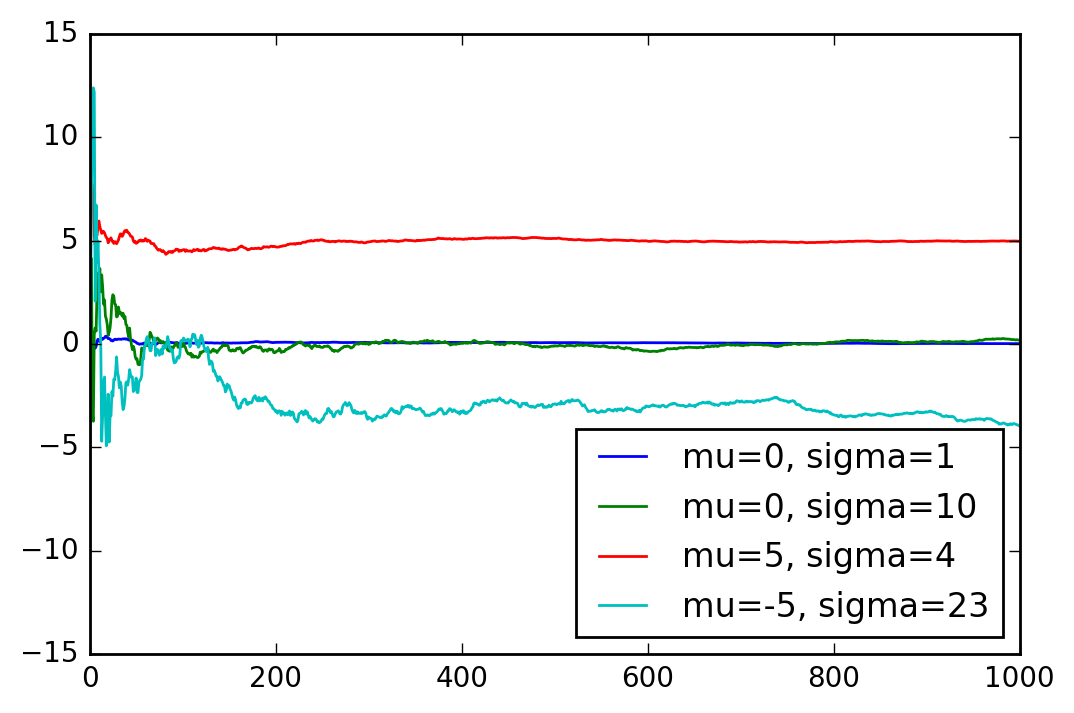

In [102]:
n = 1000

for mu, sigma in zip(mus, sigmas):
    x = mu + sigma * np.random.randn(n)
    mean_progression = [np.mean(x[:i+1]) for i in range(n)]
    plt.plot(mean_progression, label='mu={}, sigma={}'.format(mu, sigma))
    
plt.legend(loc='best')
plt.show()

> 3) Effectuer la même étude que 2) pour la variance empirique.

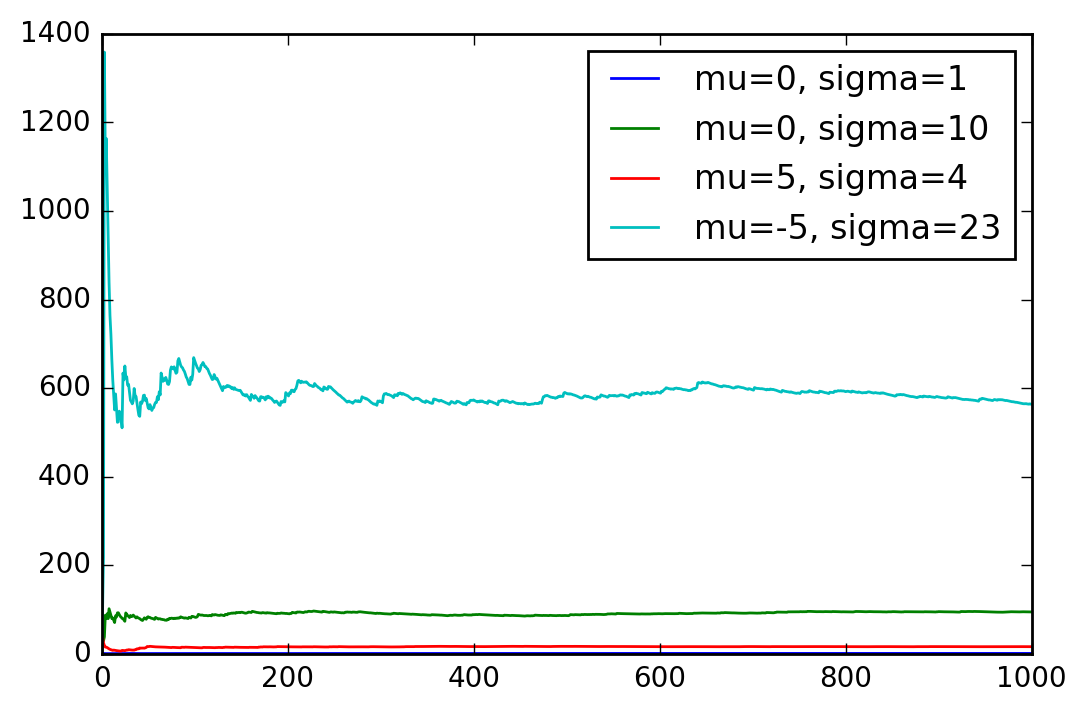

In [40]:
n = 1000

for mu, sigma in zip(mus, sigmas):
    x = mu + sigma * np.random.randn(n)
    var_progression = [np.var(x[:i+1]) for i in range(n)]
    plt.plot(var_progression, label='mu={}, sigma={}'.format(mu, sigma))
    
plt.legend(loc='best')
plt.show()

## 4. Test de normalité

In [41]:
series = [8.41, 8.26, 7.99, 7.76, 7.56, 7.32, 8.41, 8.13, 7.86, 7.73, 7.44, 7.22, 8.32, 8.12, 7.85, 7.57, 7.35, 5.23]

> 1) Etudier la normalité de cette série de données qualitativement.

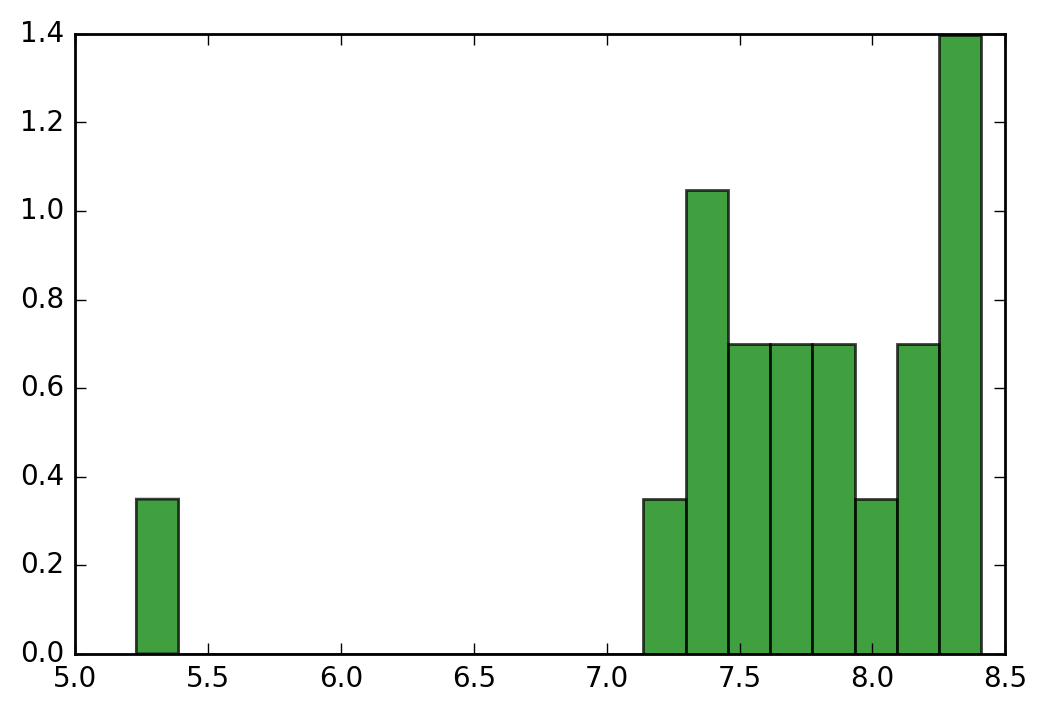

In [42]:
n, bins, patches = plt.hist(series, 20, normed=1, facecolor='green', alpha=0.75)
plt.show()

> 2) Etudier la normalité de cette série de données à l'aide d'un test statistique.

In [43]:
from scipy.stats import shapiro

alpha = 0.05

test_statistic, p_value = shapiro(series)

print('Reject: {}'.format(p_value < alpha))

Reject: True


On rejète l'hypothèse $H_0$ selon laquelle les données sont issues d'une distribution normale.

> 3) Refaire les questions 1) et 2) en supprimant la valeur 5.23 des observations.

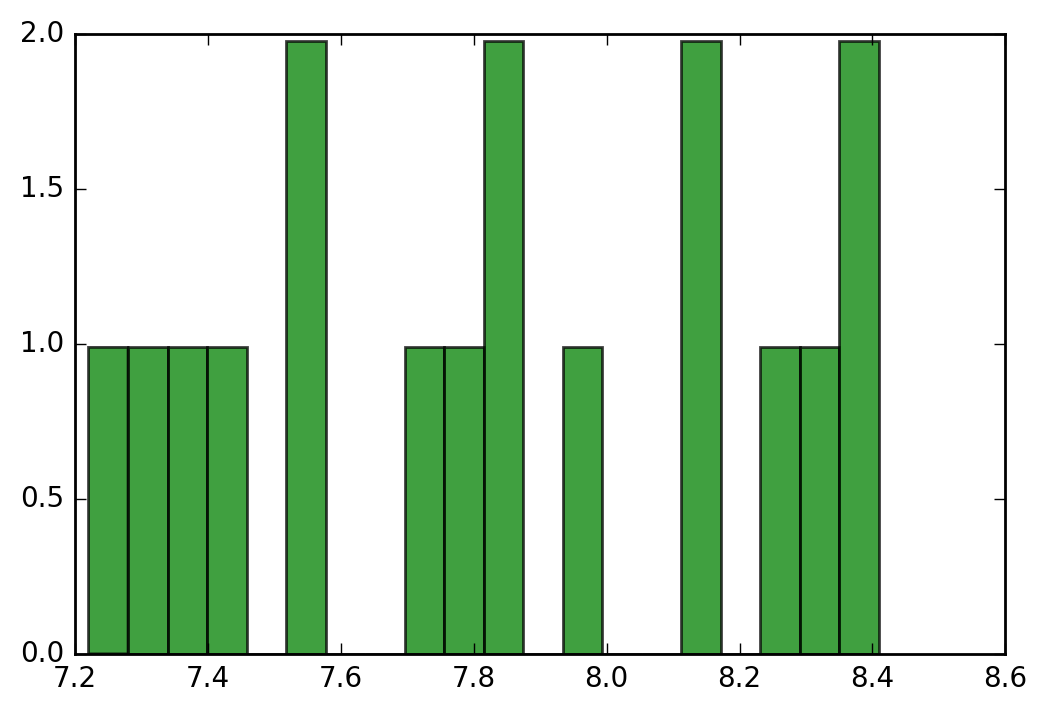

In [44]:
series_bis = series[:-1] # 5.23 est la dernière valeur de la série

n, bins, patches = plt.hist(series_bis, 20, normed=1, facecolor='green', alpha=0.75)
plt.show()

In [126]:
test_statistic, p_value = shapiro(series_bis)

print('Reject: {}'.format(p_value < alpha))

Reject: False


On garde l'hypothèse $H_0$ selon laquelle les données sont issues d'une distribution normale.